In [77]:
import dcor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [82]:
file_loc = './state_correlation_test/1.csl.vavDx.light.pittsburgh.train.res.csv'
states_pd = pd.read_csv(file_loc, index_col = 0, skiprows = 3)


In [83]:
states_pd

,Environment,Environment.1,Environment.2,Environment.3,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SW,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM,2ND%FLOOR%SOUTH:2ND%CONFERENCE%02,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE,2ND%FLOOR%SOUTH:2ND%CONFERENCE%01,...,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NMW.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SME1.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SME.2,1ST%FLOOR:1ST%RESEARCH%OPEN%NM.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE.2,1ST%FLOOR:1ST%RESEARCH%OPEN%NW.2,1ST%FLOOR:1ST%RESEARCH%OPEN%SW.2,1ST%FLOOR:1ST%RESEARCH%OPEN%SM.2
2002/6/1 0:10,16.333333,78.000000,0.0,0.0,20.368339,20.947370,21.521814,20.917128,21.422298,21.016190,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 0:20,16.666667,79.000000,0.0,0.0,20.519836,21.085171,21.638644,21.057513,21.582297,21.120332,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 0:30,17.000000,80.000000,0.0,0.0,20.361045,20.919280,21.422953,20.886851,21.337163,20.856534,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 0:40,17.333333,81.000000,0.0,0.0,20.097969,20.569483,21.185788,20.571618,21.013428,20.554141,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 0:50,17.666667,82.000000,0.0,0.0,20.337028,20.878154,21.418074,20.868395,21.313046,20.852290,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 1:00,18.000000,83.000000,0.0,0.0,20.578180,21.222661,21.648529,21.199597,21.664883,21.040188,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/6/1 1:10,17.950000,84.833333,0.0,0.0,20.312166,20.821919,21.298365,20.794993,21.164776,20.648728,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/6/1 1:20,17.900000,86.666667,0.0,0.0,19.923065,20.322879,20.964163,20.324812,20.683759,20.250393,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/6/1 1:30,17.850000,88.500000,0.0,0.0,19.768010,20.114020,20.930610,20.126722,20.530233,20.146933,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/6/1 1:40,17.800000,90.333333,0.0,0.0,19.619882,20.052557,20.807214,20.048507,20.498753,19.985561,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520


In [84]:
states_ay = states_pd.values

In [89]:
states_ay.shape

(13248, 71)

In [109]:
def get_prcd_states_single(states_ay, time_back):
    states_x = states_ay[0:-time_back, :]
    states_y = states_ay[time_back:, :]
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [115]:
single_dcors = [];
for time_i in range(1, 144):
    single_dcors.append(get_prcd_states_single(states_ay, time_i)[2].correlation_xy)

In [190]:
def get_aux_states_single(states_ay):
    mean = np.mean(states_ay)
    std = np.std(states_ay)
    states_x = np.random.normal(mean, std, size = states_ay.shape);
    states_y = states_ay;
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [200]:
single_dcors = single_dcors[1:]
single_dcors

[0.8016253522071883,
 0.7873171491219207,
 0.7703077542490797,
 0.7551750340207193,
 0.7414010228080746,
 0.7240593860542002,
 0.715829371405225,
 0.7057947685851524,
 0.6956599202192877,
 0.6896652708414833,
 0.6841246368088475,
 0.6712753972835629,
 0.6647735477567899,
 0.6546195152784589,
 0.6461279264728554,
 0.639303674408852,
 0.6323198466544463,
 0.6260155184493589,
 0.6178726246224555,
 0.6120599011691382,
 0.6033004731043197,
 0.5986797643552716,
 0.5869712172124221,
 0.5775329807462063,
 0.5694922389066522,
 0.5614984647952289,
 0.5532528397163093,
 0.5449193232207937,
 0.5369406875449284,
 0.5281403538472528,
 0.5215900345753118,
 0.5128137501583305,
 0.5059442439252841,
 0.50230239830879,
 0.49587728647175816,
 0.4870623300751607,
 0.4817490197085945,
 0.47528812979016605,
 0.4680149483328088,
 0.4598441874363587,
 0.4567458250455577,
 0.4502089588551721,
 0.4445782629486727,
 0.4397228605001794,
 0.4316339244663365,
 0.4242593827184057,
 0.41963024915058933,
 0.41290570772

In [197]:
def get_idx_with_thres(dcors, thres):
    idx = 1;
    for dcor in dcors:
        if dcor < thres:
            break;
        idx += 1;
    return idx;

In [207]:
get_idx_with_thres(single_dcors, 0.5)

35

In [158]:
def get_prcd_states_stack(states_ay, time_back):
    states_y = states_ay[time_back:, :];
    states_x = [];
    for line_i in range(states_ay.shape[0]):
        if (states_ay.shape[0] - line_i) >= (time_back + 1):
            states_x.append(states_ay[line_i: line_i + time_back].flatten().tolist());
    states_x = np.array(states_x);
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [160]:
stack_dcors = [];
for time_i in range(1, 144):
    stack_dcors.append(get_prcd_states_stack(states_ay, time_i)[2].correlation_xy)

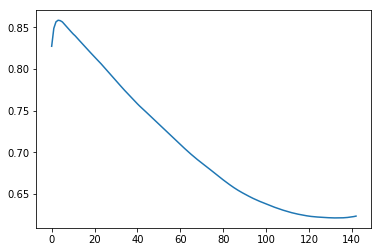

In [195]:
plt.plot(stack_dcors)

In [161]:
stats

Stats(covariance_xy=11907.01607774836, correlation_xy=0.8579947319025889, variance_x=18957.465013247333, variance_y=10159.126645923148)

In [133]:
print(y[0])

[1.80000000e+01 8.30000000e+01 0.00000000e+00 0.00000000e+00
 2.05781797e+01 2.12226612e+01 2.16485287e+01 2.11995969e+01
 2.16648828e+01 2.10401879e+01 2.03378237e+01 2.20062343e+01
 2.03243841e+01 2.19989913e+01 2.09989709e+01 2.11410706e+01
 2.03254045e+01 2.09024775e+01 2.04584599e+01 2.10396796e+01
 2.10433443e+01 1.98943007e+01 2.11819041e+01 2.05219664e+01
 2.09127554e+01 2.00200759e+01 1.94359421e+04 2.74373306e+01
 2.82398407e+01 2.82064900e+01 2.76770225e+01 2.78929448e+01
 2.82710704e+01 2.82830028e+01 2.81405238e+01 2.78934023e+01
 2.71488842e+01 2.77586112e+01 2.84344343e+01 2.89238214e+01
 2.85606338e+01 2.78010264e+01 2.84777223e+01 2.84509423e+01
 2.69096399e+01 2.82507418e+01 2.82107228e+01 2.77855292e+01
 2.83827043e+01 1.74373306e+01 1.89238214e+01 1.82398407e+01
 1.84509423e+01 1.82507418e+01 1.82064900e+01 1.83827043e+01
 1.78929448e+01 1.81405238e+01 1.71488842e+01 1.82710704e+01
 1.69096399e+01 1.85606338e+01 1.82830028e+01 1.78934023e+01
 1.84344343e+01 1.780102